**Proyecto 1 "Relación Minutos Ingreso”**

**Nombres de los integrantes del grupo:**


*   CRISTIAN FELIPE BARBOSA TUNJANO
*   DAVID BORRERO DIAZ
*   MICHAEL ALEJANDRO GOMEZ RAMIREZ
*   NICOLAS SUAREZ


**Una explicación breve del problema teniendo en cuenta lo siguiente:**

Este estudio tiene como objetivo investigar la relación entre el total de minutos utilizados por los clientes y sus ingresos totales en una empresa de telecomunicaciones. Utilizando la base Credito_dias.csv, emplearemos un enfoque que combina análisis estadístico, descriptivo, visualización de datos y técnicas de modelado predictivo como la correlación y regresión lineal. Además, consideraremos variables adicionales como la posesión de tarjeta de crédito y la antigüedad. Este enfoque nos permitirá identificar posibles relaciones lineales entre las variables de estudio, sino que también proporcionará valiosos insights para la toma de decisiones estratégicas en la mejora de productos y campañas publicitarias de la empresa.

In [75]:
import pandas as pd
import seaborn as sns
import  matplotlib as plt
df = pd.read_csv("https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


In [77]:
#borraremos customer id que no deberia ser una variable de interes para el ejercicio
df = df.drop(['Customer_ID'],axis=1)

notamos que el valor creditcd no tiene algunos registros

In [78]:
df.describe()

,totmou,totrev,eqpdays
count,10000.000000,10000.000000,10000.000000
mean,7692.804866,1042.133807,386.794500
std,8657.917883,857.144895,252.720196
min,0.000000,11.100000,-5.000000
25%,2576.000000,526.787500,210.000000
50%,5262.000000,820.235000,338.000000
75%,9823.250000,1272.975000,522.000000
max,163264.176700,13426.600000,1823.000000


array([[<Axes: title={'center': 'totmou'}>,
        <Axes: title={'center': 'totrev'}>],
       [<Axes: title={'center': 'eqpdays'}>, <Axes: >]], dtype=object)

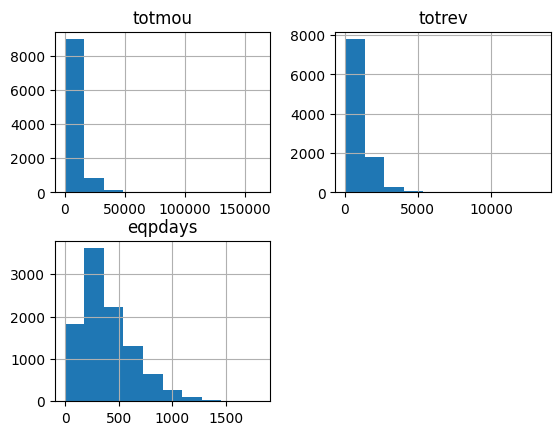

In [79]:
df.hist()

totmou        Axes(0.125,0.11;0.227941x0.77)
totrev     Axes(0.398529,0.11;0.227941x0.77)
eqpdays    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

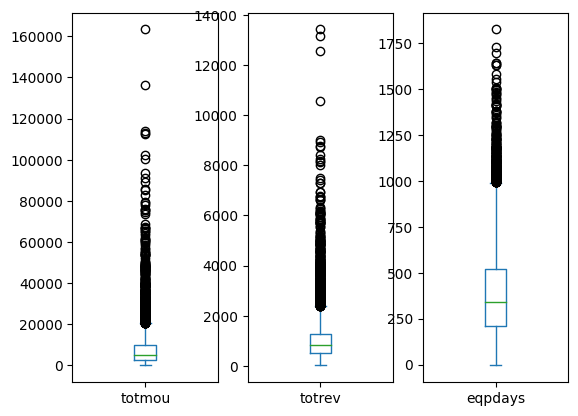

In [80]:
df.plot(kind='box',subplots=True)

<Axes: >

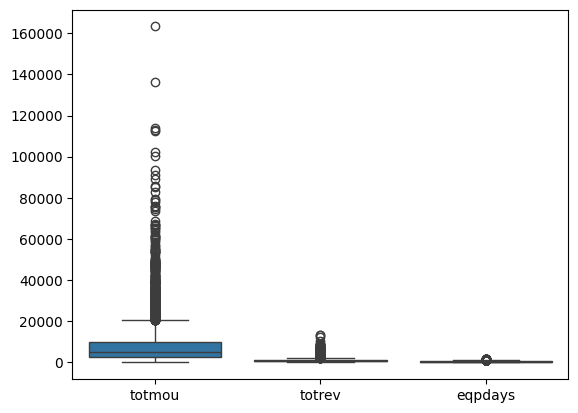

In [82]:
sns.boxplot(df)

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))
for i, col in enumerate(df.columns):
  ax = axes[i // 4, i % 4]
  df[col].plot.box(ax=ax)
plt.show()

Notamos que la variable eqp days tiene un valor minimo de -5 lo cual no tiene sentido

In [ ]:
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),annot=True,fmt=".2f",cmap="YlGnBu")

notamos que las variables que tienen